In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
dataset = pd.read_csv('energy_harvesting_data.csv')

In [9]:
dataset = data.fillna(0)  # or data.dropna()

In [10]:
features = dataset[['Step_Frequency (steps/sec)', 'Foot_Pressure (N)', 'Stride_Length (m)', 'User_Weight (kg)', 'Displacement_Force (N)']]
target = dataset['Energy_Output (mA)']


In [11]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)


In [14]:
rf_model.fit(X_train_scaled, y_train)


RandomForestRegressor(random_state=42)

In [15]:
predictions_rf = rf_model.predict(X_test_scaled)


In [16]:
mae_rf = mean_absolute_error(y_test, predictions_rf)
r2_rf = r2_score(y_test, predictions_rf)

In [29]:
importances = best_rf_model.feature_importances_
feature_names = features.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
print(importance_df.sort_values(by='Importance', ascending=False))

                      Feature  Importance
2           Stride_Length (m)    0.209220
1           Foot_Pressure (N)    0.204999
0  Step_Frequency (steps/sec)    0.200486
4      Displacement_Force (N)    0.197628
3            User_Weight (kg)    0.187667


In [32]:
dataset['Pace'] = dataset['Step_Frequency (steps/sec)'] * dataset['Stride_Length (m)']
dataset['Impact'] = dataset['Foot_Pressure (N)'] / dataset['User_Weight (kg)']

In [33]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split

# Initialize LightGBM Regressor
lgb_model = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.05, max_depth=10, random_state=42)

# Train the model
lgb_model.fit(X_train_scaled, y_train)

# Make predictions
predictions_lgb = lgb_model.predict(X_test_scaled)

# Evaluate the model
mae_lgb = mean_absolute_error(y_test, predictions_lgb)
r2_lgb = r2_score(y_test, predictions_lgb)

print(f'LightGBM MAE: {mae_lgb:.4f}')
print(f'LightGBM R²: {r2_lgb:.4f}')

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001566 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 5
[LightGBM] [Info] Start training from score 0.760461
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBM MAE: 0.3743
LightGBM R²: -0.0151


In [31]:
dataset['Log_Displacement_Force'] = np.log(dataset['Displacement_Force (N)'] + 1)

In [ ]:
print(f'Random Forest Mean Absolute Error: {mae_rf:.4f}')
print(f'Random Forest R-squared: {r2_rf:.4f}')


In [22]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [23]:
rf_model = RandomForestRegressor(random_state=42)

In [24]:
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_absolute_error')


In [25]:
grid_search.fit(X_train_scaled, y_train)


Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_absolute_error', verbose=2)

In [26]:
print(f"Best Parameters: {grid_search.best_params_}")


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}


In [27]:
best_rf_model = grid_search.best_estimator_
predictions_rf = best_rf_model.predict(X_test_scaled)


In [ ]:
mae_rf = mean_absolute_error(y_test, predictions_rf)
r2_rf = r2_score(y_test, predictions_rf)

print(f'Optimized Random Forest MAE: {mae_rf:.4f}')
print(f'Optimized Random Forest R²: {r2_rf:.4f}')

In [18]:
import matplotlib.pyplot as plt
import numpy as np

In [19]:
feature_importance = rf_model.feature_importances_


In [20]:
# Sort feature importances in descending order
sorted_idx = np.argsort(feature_importance)[::-1]

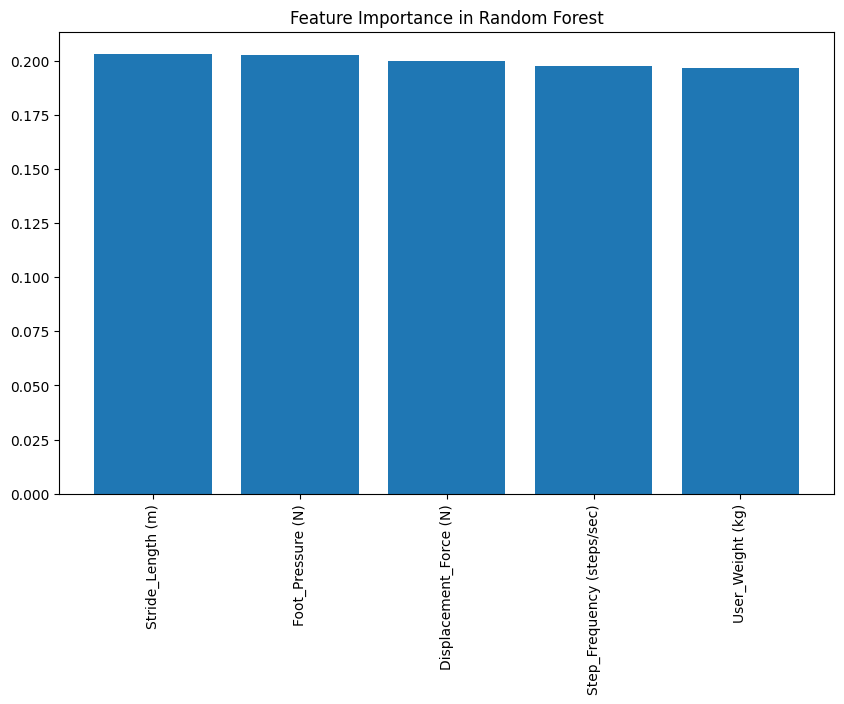

In [21]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.xticks(range(len(sorted_idx)), [features.columns[i] for i in sorted_idx], rotation=90)
plt.title("Feature Importance in Random Forest")
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop('energy_output', axis=1))

In [ ]:
X = scaled_data  # Features
y = data['energy_output']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

In [ ]:
import pickle

with open('energy_optimization_model.pkl', 'wb') as f:
    pickle.dump(best_so_far, f)